# Лабораторная работа по курсу BIG DATA (Python)

### Задание. 
Дан набор данных по оттоку клиентов.   
Набор данных содержит всего 5 000 записей (т.е. абонентов).   
Данные доступны тут - https://drive.google.com/open?id=1ArslqEEno2hrr5tAs25P0JN0P-coLcFD  
Перечень полей:  
•	state – штат;  
•	account length – абонентский стаж;  
•	area code – код региона;  
•	phone number – номер телефона;  
•	international plan – тарифный план для международных звонков;  
•	voice mail plan – тарифный план для голосовой почты;  
•	number vmail messages – количество сообщений голосовой почты;  
•	total day minutes – общая длительность звонков в дневное время (мин);  
•	total day calls – общее количество звонков в дневное время;  
•	total day charge – общая стоимость звонков в дневное время;  
•	total eve minutes – общая длительность звонков в вечернее время (мин);  
•	total eve calls – общее количество звонков в вечернее время;  
•	total eve charge – общая стоимость звонков в вечернее время;  
•	total night minutes – общая длительность звонков в ночное время (мин);  
•	total night calls – общее количество звонков в ночное время;  
•	total night charge – общая стоимость звонков в ночное время;  
•	total intl minutes – общая длительность международных звонков (мин);  
•	total intl calls – общее количество международных звонков;    
•	total intl charge – общая стоимость международных звонков;  
•	number customer service calls – количество звонков в службу поддержки;  
•	churned – покинул ли клиент компанию.  

Ваша задача используя Pandas или PySpark ответить на следующие вопросы:
1.	Построить гистограмму количества звонков в техническую поддержку
2.	Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
3.	Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку
4.	Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
5.	Вывести top-5 самых много и самых мало говорящих клиентов
6.	Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора  в зависимости от штата
7.	Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark
8.	Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)
9.	Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке.


## 1. Загрузка данных

In [1]:
import pandas as pd

In [49]:
df = pd.read_csv('churn.csv', sep=',')
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [ ]:
df.info()

In [ ]:
df.describe()

### 1. Гистограмма количества звонков в техническую поддержку

In [5]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Количество')

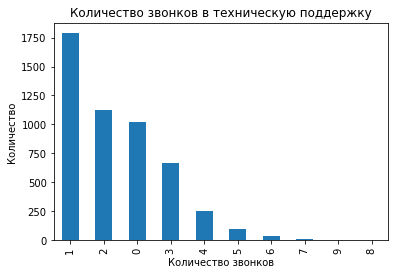

In [36]:
df['number_customer_service_calls'].value_counts().plot(kind='bar')
plt.title('Количество звонков в техническую поддержку')
plt.xlabel('Количество звонков')
plt.ylabel('Количество')

### Правильное решение:

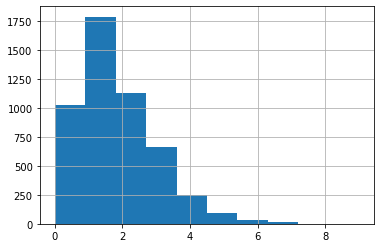

In [107]:
df['number_customer_service_calls'].hist()

### 2.	Рассчет и построение гистограммы общей длительности звонков клиента (дневных + ночных + вечерних + международных)

In [37]:
total_minutes = df[['area_code', 'phone_number', 'churned', 'number_customer_service_calls', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']]
total_minutes['total'] = total_minutes[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']].sum(axis=1)
total_minutes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_code,phone_number,churned,number_customer_service_calls,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total
0,415,382-4657,False,1,265.1,197.4,244.7,10.0,717.2
1,415,371-7191,False,1,161.6,195.5,254.4,13.7,625.2
2,415,358-1921,False,0,243.4,121.2,162.6,12.2,539.4
3,408,375-9999,False,2,299.4,61.9,196.9,6.6,564.8
4,415,330-6626,False,3,166.7,148.3,186.9,10.1,512.0
...,...,...,...,...,...,...,...,...,...
4995,408,365-8751,False,2,235.7,223.0,297.5,9.9,766.1
4996,415,334-9736,True,3,184.2,256.8,213.6,14.7,669.3
4997,415,333-6861,False,1,140.6,172.8,212.4,13.6,539.4
4998,510,394-2206,False,0,188.8,171.7,224.4,8.5,593.4


### Решение преподавателя:

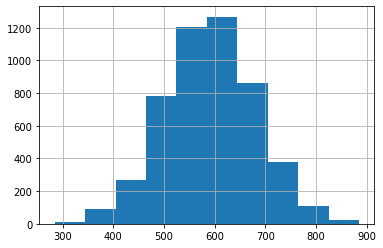

In [108]:
df['total_calls'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['total_calls'].hist()

### 3.	Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [117]:
from math import sqrt

In [38]:
r = sum((total_minutes['total'] - total_minutes['total'].mean()) * (total_minutes['number_customer_service_calls'] - total_minutes['number_customer_service_calls'].mean())) / \
    sqrt(sum((total_minutes['total'] - total_minutes['total'].mean())**2) * sum((total_minutes['number_customer_service_calls'] - total_minutes['number_customer_service_calls'].mean())**2))
r

-0.01140791082744116

In [39]:
k = ((total_minutes['total'] - total_minutes['total'].mean()) * (total_minutes['number_customer_service_calls'] - total_minutes['number_customer_service_calls'].mean())).sum() / \
    sqrt(((total_minutes['total'] - total_minutes['total'].mean())**2).sum() * ((total_minutes['number_customer_service_calls'] - total_minutes['number_customer_service_calls'].mean())**2).sum())
k

-0.011407910827441414

### Решение преподавателя:

In [109]:
total_calls = df['total_calls'].values
service_calls = df['number_customer_service_calls'].values
total_calls_mean = total_calls.mean()
customer_service_mean = service_calls.mean()

In [110]:
total_calls_shifted = total_calls - total_calls_mean
service_calls_shifted = service_calls - customer_service_mean

In [119]:
(total_calls_shifted * service_calls_shifted).sum() / (sqrt( (total_calls_shifted**2).sum() * ( (service_calls_shifted**2).sum() ) ) )

-0.011407910827441414

In [120]:
# Для самопроверки
df[['total_calls', 'number_customer_service_calls']].corr(method='pearson')

,total_calls,number_customer_service_calls
total_calls,1.000000,-0.011408
number_customer_service_calls,-0.011408,1.000000


### 4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

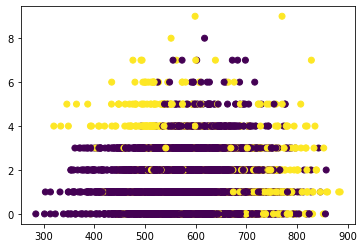

In [40]:
plt.scatter(total_minutes['total'], total_minutes['number_customer_service_calls'], c=total_minutes['churned'])
plt.show()

### Решение преподавателя:

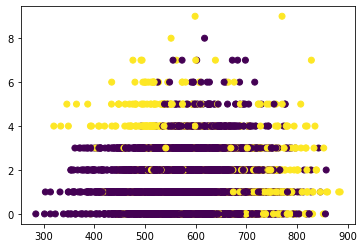

In [121]:
plt.scatter(total_calls, service_calls, c=df['churned'])

### 5. Вывести top-5 самых много и самых мало говорящих клиентов

In [41]:
# top-5 most speaking
total_minutes[['phone_number', 'total', 'churned']].sort_values('total', ascending=False).head()

,phone_number,total,churned
985,345-9140,885.0,True
289,352-6976,882.2,True
3205,345-3787,860.2,True
4991,410-3888,858.2,True
4271,370-4667,857.4,False


In [43]:
# top-5 least speaking
total_minutes[['phone_number', 'total', 'churned']].sort_values('total').head()

,phone_number,total,churned
648,331-3174,284.3,False
1233,380-5246,301.5,False
3779,362-8044,303.2,False
1986,405-9233,313.0,False
992,375-8934,313.3,False


### Решение преподавателя:

In [122]:
df.sort_values('total_calls', ascending=False).head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_calls
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True,885.0
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,260.9,114,22.18,312.1,89,14.04,5.3,3,1.43,1,True,882.2
3205,MS,111,408,345-3787,no,no,0,294.7,90,50.10,294.6,72,25.04,260.1,121,11.70,10.8,3,2.92,1,True,860.2
4991,AZ,97,510,410-3888,no,no,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1,True,858.2
4271,MO,103,415,370-4667,no,yes,37,230.7,112,39.22,319.4,116,27.15,299.4,77,13.47,7.9,3,2.13,2,False,857.4


In [123]:
df.sort_values('total_calls').head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_calls
648,WI,131,415,331-3174,no,yes,39,69.1,122,11.75,101.3,136,8.61,104.8,94,4.72,9.1,4,2.46,0,False,284.3
1233,IL,48,510,380-5246,no,no,0,128.2,71,21.79,48.1,78,4.09,116.3,80,5.23,8.9,3,2.40,0,False,301.5
3779,MN,141,408,362-8044,no,no,0,77.8,123,13.23,144.4,119,12.27,75.3,65,3.39,5.7,7,1.54,1,False,303.2
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False,313.0
992,MI,45,510,375-8934,no,yes,26,91.7,104,15.59,150.6,119,12.80,63.3,103,2.85,7.7,5,2.08,1,False,313.3


### 6.	Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора  в зависимости от штата

In [80]:
churn_true = df[['state', 'churned']]
churn_rate = round((churn_true[churn_true.churned == True].groupby('state').count() / churn_true.groupby('state').count()) * 100)
churn_rate = churn_rate.sort_values('churned', ascending=False).reset_index()
churn_rate.rename(columns = {churn_rate.columns[-1]: 'rate_%'}).head(10)

,state,rate_%
0,CA,27.0
1,NJ,25.0
2,WA,24.0
3,TX,22.0
4,MT,21.0
5,MD,21.0
6,NV,19.0
7,KS,18.0
8,OK,18.0
9,NY,18.0


In [83]:
cost_per_day_minute = df[['state', 'total_day_charge', 'total_day_minutes']]
cost_per_day_minute['cost_per_minute'] = df.total_day_charge / df.total_day_minutes
cost_per_day_minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,total_day_charge,total_day_minutes,cost_per_minute
0,KS,45.07,265.1,0.170011
1,OH,27.47,161.6,0.169988
2,NJ,41.38,243.4,0.170008
3,OH,50.90,299.4,0.170007
4,OK,28.34,166.7,0.170006
...,...,...,...,...
4995,HI,40.07,235.7,0.170004
4996,WV,31.31,184.2,0.169978
4997,DC,23.90,140.6,0.169986
4998,DC,32.10,188.8,0.170021


In [84]:
avg_day_charge = cost_per_day_minute.groupby('state').mean()[['cost_per_minute']].sort_values('cost_per_minute', ascending=False).reset_index()
avg_day_charge.head(10)

,state,cost_per_minute
0,OR,0.170009
1,DC,0.170009
2,IA,0.170008
3,OH,0.170008
4,KY,0.170008
5,SC,0.170008
6,MO,0.170008
7,ND,0.170007
8,ME,0.170007
9,VT,0.170006


### Решение преподавателя:

In [127]:
df['day_minute_cost'] = df['total_day_charge'] / df['total_day_minutes']

In [125]:
df.groupby('state')[['churned', 'day_minute_cost']].agg('mean').sort_values('churned', ascending=False).head()

,churned,day_minute_cost
state,,
CA,0.269231,0.170003
NJ,0.250000,0.170001
WA,0.244898,0.170002
TX,0.224138,0.170003
MT,0.212121,0.170001


### 7.	Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [85]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [86]:
df_get_dummies = pd.get_dummies(df, columns = ['state'])
df_get_dummies

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4997,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Решение преподавателя:

In [128]:
df_dum = pd.get_dummies(df, columns=['state'])

In [129]:
df_dum

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_calls,day_minute_cost,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,0.170011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,0.169988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,0.170008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,0.170007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,0.170006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False,766.1,0.170004,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True,669.3,0.169978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4997,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False,539.4,0.169986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False,593.4,0.170021,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 8.	Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [90]:
df_m = df_get_dummies.drop('area_code', axis=1)
df_mo = df_m.drop('phone_number', axis=1)
df_mod = df_mo.drop('international_plan', axis=1)
df_mode = df_mod.drop('voice_mail_plan', axis=1)
df_mode

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4997,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,109,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
df_mode.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 's

In [92]:
df_model = df_mode[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge',\
                 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',\
                 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',\
                 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',\
                 'state_WV', 'state_WY']]
res = df_mode.churned 

In [93]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df_model, res, test_size=0.30) # разделяю выборку на тренировочную и тестовую
y_test = y_test.reset_index().churned # сбрасываю индекс y_test

### Решение преподавателя:

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_dum[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY']], df_dum['churned'], test_size=0.2)

### 9.	Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке.

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [101]:
lda = LinearDiscriminantAnalysis() # инициализирую LDA функционал
lda.fit(X_train, y_train) # обучаем данные

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [102]:
lda.predict(X_test) # делаю прогноз на тестовой выборке

array([False, False, False, ..., False, False, False])

In [103]:
# смотрю разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.columns = ['churned_test', 'churned_pred']
result

,churned_test,churned_pred
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,True,False
1496,False,True
1497,True,False
1498,False,False


In [104]:
from sklearn.metrics import accuracy_score

In [105]:
# Оценка качества модели
accuracy_score(y_test, lda.predict(X_test))

0.8626666666666667

In [106]:
lda.score(X_test, y_test) # значение коэффициента детерминации

0.8626666666666667

### Решение преподавателя:

9. Привести данные к одному масштабу при помощи StandardScaler

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
sc = StandardScaler()

In [133]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Решение преподавателя:

10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr = LogisticRegression()

In [136]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
lr.score(X_test, y_test)

0.838